In [3]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [75]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import re
from math import sqrt
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

cats = ['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x' ]
# cats = ['alt.atheism', 'sci.space','comp.graphics','rec.sport.baseball','talk.politics.misc']
#indices = [0,5,6,12,18]
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, remove=('headers', 'footers', 'quotes'), categories = cats)
# twenty_train = [twenty_train[index] for index in indices]
# print(list(twenty_train.target_names))

twenty_test = fetch_20newsgroups(subset='test', shuffle=True, categories = cats)
# twenty_test = [twenty_test[index] for index in indices]
# print(list(twenty_test.target_names))

type(twenty_train)

#Extract data to proper type
data= pd.Series(twenty_train.data) 
data= pd.DataFrame(data) 
data.columns = ['Data'] + data.columns.tolist()[1:] 
data['target'] = pd.Series(twenty_train.target)
data['words'] = [len(x.split()) for x in data['Data'].tolist()]
count_vect = CountVectorizer()
#r[\d_.,:()?!;$#*"\'\[\]\\\n]+
data['Data'] = data['Data'].str.replace(r'[\d_.,:()?!;$#*"\'\[\]\\]+', ' ', regex=True)
data['Data'] = data['Data'].str.replace("\n"," ")
data['Data'] = data['Data'].str.replace("\t"," ")
data['Data'] = data['Data'].str.replace(r'[^0-9a-zA-Z\']+',' ')


data_test = pd.Series(twenty_test.data) 
data_test = pd.DataFrame(data_test) 
data_test.columns = ['Data'] + data_test.columns.tolist()[1:] 
data_test['target'] = pd.Series(twenty_test.target)
data_test['words'] = [len(x.split()) for x in data_test['Data'].tolist()]
data_test['Data'] = data_test['Data'].str.replace(r'[\d_.,:()?!;$#*"\'\[\]\\]+', ' ', regex=True)
data_test['Data'] = data_test['Data'].str.replace("\n"," ")
data_test['Data'] = data_test['Data'].str.replace("\t"," ")
data_test['Data'] = data_test['Data'].str.replace(r'[^0-9a-zA-Z\']+',' ')



data = data.sample(frac=1).reset_index(drop=True)


#train data test data
train_data = data[:int(len(data) * 0.9)]
test_data = data_test[int(len(data_test) * 0.9):]

#cross_validation_data = data_test[int(len(data_test) * 0.1)].append(data)
cross_validation_data = train_data.append(test_data)
print("dat", cross_validation_data)

# data_test = data_test[int(len(data_test) * 0.3)::int(len(data_test) * 0.6)]


X_train_counts = count_vect.fit_transform(data['Data'])
X_train_counts.shape

vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data['Data'])
data_test_vectors = vectorizer.transform(data_test['Data']) 

valid_data_vectors = vectorizer.fit_transform(cross_validation_data['Data'])

#train
Xtr = data_train_vectors
ytr = data['target']

#valid 
Xtc = valid_data_vectors
ytc = cross_validation_data['target']
#cross_validation_data = data[int(len(data) * 0.3):int(len(data) * 0.7)]

clf_MNB = MultinomialNB(alpha=.01)
clf_MNB.fit(Xtr, ytr)
# y_pred = clf_MNB.predict(Xtt)
# y_pred_score_mnb = clf_MNB.predict_proba(Xtt)
# Predict the response for a new observation


Xtt = data_test_vectors
#print("Xtt:\n", Xtt)

# store testing response vector in "ytt"
ytt = data_test['target']
#ytt = ytt[int(len(ytt) * 0.3)::int(len(ytt) * 0.6)]
#print("ytt:",ytt)

y_pred = clf_MNB.predict(Xtt)
#\print("Predicted Class Labels:",y_pred)

# Predict the response score for a new observation
y_pred_score_mnb = clf_MNB.predict_proba(Xtt)
#print("Predicted Score:\n",y_pred_score_mnb)

clf_mnb = MultinomialNB(alpha=.01)



# print("MultinomialNB 10-Cross Validation Score:",cross_val_score(clf_mnb, Xtr, ytr, cv=10, scoring='accuracy').mean())
# print("np mean", np.mean(y_pred == ytt))

# print("MultinomialNB 10-Cross Validation Score:",cross_val_score(clf_mnb, Xtc, ytc, cv=10, scoring='accuracy').mean())
# print("np mean", np.mean(y_pred == ytt))

clf_mnb.fit(Xtr, ytr)
predicted = clf_mnb.predict(Xtt)

print("MultinomialNB K-Cross Validation Score:",cross_val_score(clf_mnb, Xtr, ytr, cv=10, scoring='accuracy').mean())
print("np mean", np.mean(predicted == ytt))
print("Classification Accuracy:",metrics.accuracy_score(ytt, predicted))
print(metrics.classification_report(ytt, predicted,target_names=twenty_test.target_names))
print(metrics.confusion_matrix(ytt, predicted))

print("MultinomialNB 10-Cross Validation Score:",cross_val_score(clf_mnb, Xtc, ytc, cv=10, scoring='accuracy').mean())
print("np mean", np.mean(predicted == ytt))

clf_dt = DecisionTreeClassifier(min_samples_split=3)
clf_dt.fit(Xtr, ytr)
predicted_dt = clf_dt.predict(Xtt)
print("DT K-Cross Validation Score:",cross_val_score(clf_dt, Xtr, ytr, cv=10).mean())
print("DT K-Cross Validate:",cross_validate(clf_dt, Xtr, ytr, cv=10))
print("np mean", np.mean(predicted_dt == ytt))

# clf_dt2 = DecisionTreeClassifier(min_samples_split=3)
# clf_dt2.fit(Xtr, ytr)
# predicted_dt2 = clf_dt.predict(Xtt)
# print("DT 10-Cross Validation Score:",cross_val_score(clf_dt2, Xtc, ytc, cv=3).mean())
# print("DT 10-Cross Validate:",cross_validate(clf_dt2, Xtc, ytc, cv=5))
# print("np mean", np.mean(predicted_dt2 == ytt))




#print("Acc", clf_dt.score(predicted_dt,ytt))

#print("Classification Accuracy:",metrics.accuracy_score(ytt, predicted_dt))

kfold = model_selection.KFold(n_splits=10, random_state=100, shuffle = True)
model_kfold = DecisionTreeClassifier()
model_kfold.fit(Xtr, ytr)
pred2 = model_kfold.predict(Xtt)
results_kfold = model_selection.cross_val_score(model_kfold, Xtr, ytr, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 
print("Classification Accuracy", np.mean(pred2 == ytt))
print("Depth = ", model_kfold.get_depth())

skfold = StratifiedKFold(n_splits=10, random_state=100, shuffle = True)
model_skfold = DecisionTreeClassifier()
model_skfold.fit(Xtr,ytr)
pred = model_skfold.predict(Xtt)
results_skfold = model_selection.cross_val_score(model_skfold, Xtc, ytc, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
print("Classification Accuracy", np.mean(pred == ytt))
print("Depth = ", model_skfold.get_depth())

#skfold = StratifiedKFold(n_splits=3)
# model_skfold2 = DecisionTreeClassifier(min_samples_split=3)
# model_skfold2.fit(Xtr,ytr)
# pred2 = model_skfold2.predict(Xtt)
# results_skfold = model_selection.cross_val_score(model_skfold2, Xtc, ytc, cv=3)
# print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))
# print("np mean", np.mean(pred2 == ytt))


clf_dt3 = DecisionTreeClassifier()
clf_dt3.fit(Xtr, ytr)
predicted3 = clf_dt3.predict(Xtt)
print(metrics.classification_report(ytt, predicted3,target_names=twenty_test.target_names))
#print("Classification Accuracy:",metrics.accuracy_score(ytt, pred))

print(metrics.confusion_matrix(ytt, predicted3))
print("Classification Accuracy", np.mean(predicted3 == ytt))
print("Depth = ", clf_dt3.get_depth())


# print("---------------------")
tree_para = {'criterion':['gini'],'max_depth':[30], 'max_leaf_nodes' : [5], 'min_samples_split': [2]}
# tree_para = {'criterion':['gini'],'max_depth':[4,10,30,150], 'max_leaf_nodes' : [5,25,95], 'min_samples_split': [2, 3, 4]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_para, cv=5)
grid.fit(Xtr, ytr)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print("Best", grid.best_estimator_)



# define the parameter values that should be searched for MNB
# alpha = [0.001, 0.01, 0.1, 0, 10, 20, 30, 100]

# print (alpha)

# param_grid = dict(alpha=alpha)

# grid = GridSearchCV(clf_mnb, param_grid, cv=10, scoring='accuracy')

# grid.fit(Xtr, ytr)

# grid.cv_results_

# examine the first tuple
# print(grid.cv_results_[0].parameters)
# print(grid.cv_results_[0].cv_validation_scores)
# print(grid.cv_results_[0].mean_validation_score)

# examine the best model
# print(grid.best_score_)
# print(grid.best_params_)
# print(grid.best_estimator_)
# folds = [2,3,4]
# for fold in folds:
#     clf_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=fold,random_state=0)
#     clf_dt.fit(Xtr, ytr)
#     predicted_dt = clf_dt.predict(Xtt)
#     print("np mean", np.mean(predicted_dt == ytt))
#     print("Decision Tree 10-Cross Validation Score:",cross_val_score(clf_dt, Xtr, ytr, cv=10, scoring='accuracy').mean())

#Good
# folds = [2]
# for fold in folds:
#     clf_dt = DecisionTreeClassifier(min_samples_split=fold,random_state=0)

#     # text_clf_dt = Pipeline([('vect', CountVectorizer()),
#     #                         ('tfidf', TfidfTransformer()),
#     #                         ('clf-dt', clf_dt),
#     #                        ])

#     clf_dt.fit(Xtr, ytr)
#     predicted_dt = clf_dt.predict(Xtt)
#     print("np mean", np.mean(predicted_dt == ytt))
#     print("DT 10-Cross Validation Score:",cross_val_score(clf_dt, Xtr, ytr, cv=10, scoring='accuracy').mean())
#     print("DT 10-Cross Validation Score:",cross_val_score(clf_dt, Xtr, ytr, cv=3, scoring='accuracy').mean())
#     print("DT ", cross_validate(clf_dt, Xtr, ytr, cv=10))

dat                                                    Data  target  words
0     If a PC has one does Windows use a math co pro...       1     33
1     After having OpenWindows Version for SunOS or ...       4     60
2     Ok so if everyone is cheating is there any tes...       1     73
3      Hi I ve come across a fast triangle fill draw...       0     50
4      The Sound Driver is pretty ok since it s fast...       3    205
...                                                 ...     ...    ...
1950  From jbayer ispi COM Jonathan Bayer Subject Re...       2    205
1951  From lwv cas org Larry W Virden Subject Lookin...       0    169
1952  From murthy aslslc asl dl nec com Vasudev Murt...       2    246
1953  From rts nwu edu Ted Schreiber Subject Recs on...       3    139
1954  From davidst microsoft com David Steckler Subj...       1    424

[2838 rows x 3 columns]
MultinomialNB K-Cross Validation Score: 0.7714285714285714
np mean 0.7253196930946292
Classification Accuracy: 0.725319

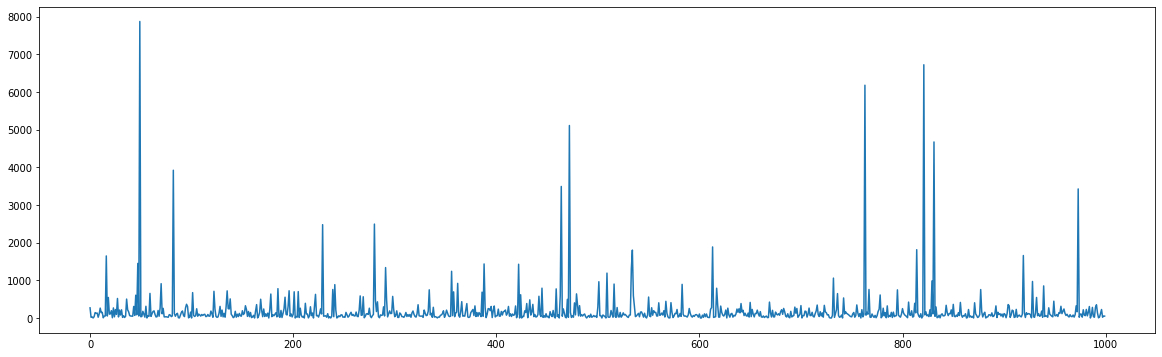

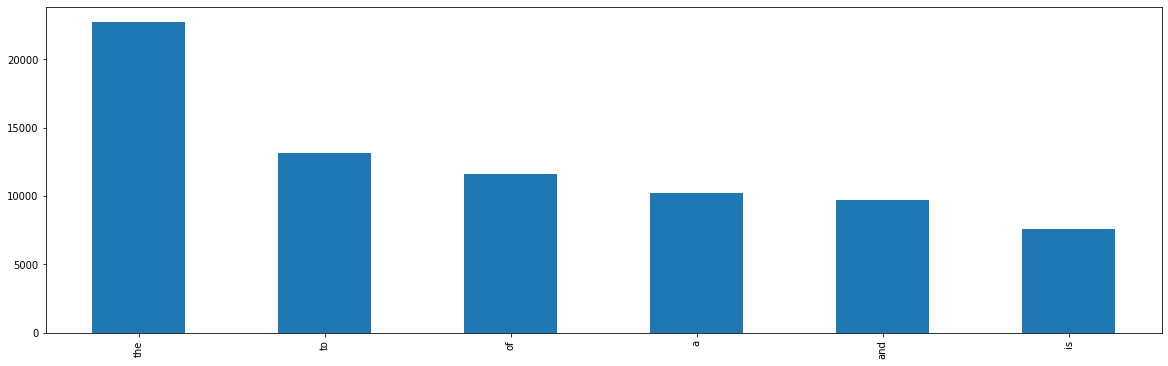

In [54]:
plt.figure(figsize=(20, 6))
plt.plot(list(range(1000)), data['words'][:1000])
plt.show()

freq = data['Data'].str.split(expand=True).stack().value_counts()

plt.figure(figsize=(20, 6))
freq[:6].plot(kind='bar')
plt.show()

In [58]:
from sklearn.tree import export_graphviz
export_graphviz( 
 grid.best_estimator_,
 out_file=("moons_tree.dot"),
 feature_names=None,
 class_names=None,
 filled=True,
)

In [74]:
import pydot

(graph,) = pydot.graph_from_dot_file('moons_tree.dot')
graph.write_png('somefile.png')
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [72]:
dot -Tpng moons_tree.dot -o moons.png

SyntaxError: invalid syntax (<ipython-input-72-037ae789b40b>, line 1)